In [10]:
import mediapipe as mp

import cv2
import pandas as pd
import numpy as np
import glob
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
import datetime
import json
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
model = load_model('../models/17-03-2023_16.39_efficientNetB0')
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_3 (Rescaling)        (None, 224, 224, 3)  0           ['input_4[0][0]']                
                                                                                                  
 normalization_3 (Normalization  (None, 224, 224, 3)  7          ['rescaling_3[0][0]']            
 )                                                                                                
                                                                                            

In [34]:
# categories_ = os.listdir('../data/raw/105_classes_pins_dataset/')[:30]

categories_ = ['pins_Adriana Lima', 'pins_Alex Lawther',
       'pins_Alexandra Daddario', 'pins_Alvaro Morte', 'pins_Amanda Crew',
       'pins_Andy Samberg', 'pins_Anne Hathaway', 'pins_Anthony Mackie',
       'pins_Avril Lavigne', 'pins_Ben Affleck', 'pins_Bill Gates',
       'pins_Bobby Morley', 'pins_Brenton Thwaites',
       'pins_Brian J. Smith', 'pins_Brie Larson', 'pins_Chris Evans',
       'pins_Chris Hemsworth', 'pins_Chris Pratt', 'pins_Christian Bale',
       'pins_Cristiano Ronaldo', 'pins_Danielle Panabaker',
       'pins_Dominic Purcell', 'pins_Dwayne Johnson', 'pins_Eliza Taylor',
       'pins_Elizabeth Lail', 'pins_alycia dabnem carey',
       'pins_amber heard', 'pins_barack obama', 'pins_barbara palvin',
       'pins_camila mendes']


1/1 [==============================] - 0s 104ms/step
pins_Alex Lawther


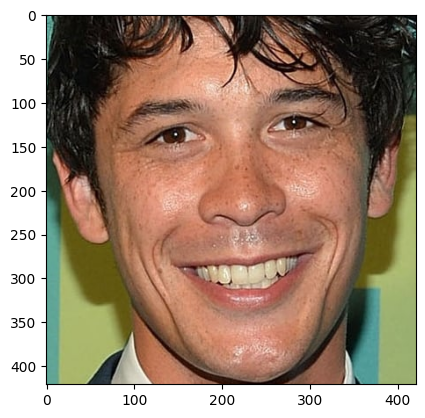

In [40]:
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# For static images:
with mp_face_detection.FaceDetection(
    model_selection=1, min_detection_confidence=0.5) as face_detection:
    image = cv2.imread('../data/external/2cmGyuIhI8pGe1W3mGXK1RtQIeK Bobby Morley.jpg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
    results = face_detection.process(image)

    h, w, c = image.shape


    # Draw face detections of each face.
    if not results.detections:
        pass

    annotated_image = image.copy()
    for detection in results.detections:
        
        data = detection.location_data.relative_bounding_box

        xleft = data.xmin*w
        xleft = int(xleft)
        xtop = data.ymin*h
        xtop = int(xtop)
        xright = data.width*w + xleft
        xright = int(xright)
        xbottom = data.height*h + xtop
        xbottom = int(xbottom)
        
        image = image[xtop:xbottom, xleft:xright]

    plt.imshow(image)
    image = cv2.resize(image, (224, 224))
    pred = model.predict(image.reshape(1, 224, 224, 3))

    label = categories_[pred.argmax()]
    print(label)
    
    